## Estimate melt fraction F, from trace element concenrations in n samples (assume F and C0 is the same for all samples).


Non-linear curve fit with bounds
P:  0.0114285  +/- 51659661.056416206  P0:  0.012029999999999999
D:  0.0039962999999999995  +/- 51659661.43072342  D0:  0.0038059999999999995
F:  0.15021279709272145  +/- 15636096.765898354
C1:  [0.77 0.86 1.16 1.74 0.45]  Predicted C1:  [0.996 0.996 0.996 0.996 0.996]


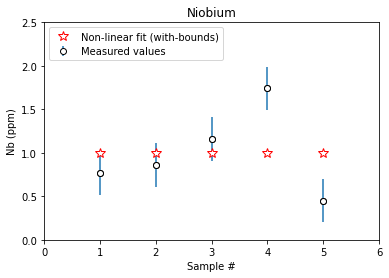

In [3]:
# -*- coding: utf-8 -*-

# Import required modules
import numpy as np
import scipy.odr.odrpack as odrpack
from scipy import stats
from scipy.optimize import curve_fit
import csv
import matplotlib.pyplot as plt

# Set C0 values for mantle source
C0 = np.full((5),0.1485) #normal MOR Nb

# Measured concentration of trace element, Nb
C1 = np.array([0.77,0.86,1.16,1.74,0.45])
sc1 = np.full((5),0.25)  #Add estimated uncertainties to measured values

Kd = np.array([0.00005,0.0015,0.0081,0.08]) #Nb
Mntm = np.array([0.58,0.27,0.12,0.03]) #mantle modes for ol,opx,cpx,sp
Mltm = np.array([0.2,0.25,0.45,0.1])   #melt modes for ol,opx,cpx,sp

P = P0 = sum(Kd*Mltm)
D = D0 = sum(Kd*Mntm)

# Define function for use with curve_fit()
def meltfc(C0,P,D,F):
    return (C0/(F*((1-P)+D)))

# Do non-linear curve fit with bounds
#-------------------------------------------------------------------
# Set values for initial guess
F=0.5

initial_guess = np.array([P,D,F])

# Set min-max bounds on parameter search for P,D,F and C0
param_bounds=([(P-P*0.05),(D-D*0.05),0.001],[(P+P*0.05),(D+D*0.05),1.])

# Run non-linear curve fit [popt is an array containing optimum fitted parameter values, pcov is the covariance matrix]
popt, pcov = curve_fit(meltfc, C0, C1, sigma=sc1, p0=initial_guess, bounds=param_bounds, method='dogbox')

perr = np.sqrt(np.diag(pcov))


print ('\nNon-linear curve fit with bounds')
print ('P: ',popt[0],' +/-',perr[0],' P0: ',P0)
print ('D: ',popt[1],' +/-',perr[1],' D0: ',D0)
print ('F: ',popt[2],' +/-',perr[2])

#print(*popt)
print('C1: ', C1,' Predicted C1: ', meltfc(C0,*popt))


# Draw plot (basically a simple x,y graph, uses matplotlib routines from pyplot)
#--------------------------------------------------------
plt.figure(1)

# Set various axes and labels etc
plt.title('Niobium')
plt.xlabel('Sample #')
plt.ylabel('Nb (ppm)')
# Set min, max values for x,y axes
plt.axis([0,6,0.,2.5])

samples = np.array([1,2,3,4,5])

# Plot Observed Nb

style_data = {'marker':'o','markersize':6, 'markerfacecolor':'w', 'markeredgecolor':'k',
       'elinewidth':1.5,'linewidth':0, 'label':'Measured values'}

plt.errorbar(samples, C1, yerr=sc1, **style_data)

plt.plot(samples, C1, 'o',markersize=6, markerfacecolor='w', markeredgecolor='k',)

# Plot curve fit model prediction
plt.plot(samples, meltfc(C0, *popt), '*',markersize=10, markerfacecolor='w', markeredgecolor='r', label='Non-linear fit (with-bounds)')

#Plot legend
plt.legend(loc='upper left')

# Write plot to pdf file
#plt.savefig('meltfc.pdf', format='pdf')

# Show the plot on screen
plt.show()
